<h1 align="center"> PCA + Logistic Regression (MNIST) </h1>

This notebook is based on https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Image_Reconstruction_and_such.ipynb courtesy of [Mohannad Elhamod](https://wordpress.cs.vt.edu/elhamod/).

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples.

The MNIST database of handwritten digits is available on the following website: [MNIST Dataset](http://yann.lecun.com/exdb/mnist/)

In [16]:
%matplotlib inline
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Download and Load the Data

In [17]:
from joblib import Memory

# fetch and cache the dataset
mem = Memory('./tmp')
fetch_openml_cached = mem.cache(fetch_openml)
mnist = fetch_openml_cached(name='mnist_784')

# get a subset
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1)
X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.33)

Make an instance of PCA

In [18]:
# explain_variance = 0.75
# pca = PCA(explain_variance) 

num_of_dimensions = 10
pca = PCA(n_components=num_of_dimensions)

Reduce the dimensionality of your data

In [19]:
lower_dimensional_data = pca.fit_transform(X_train)
pca.n_components_

10

One of the cool things about PCA is that we can go from a compressed representation back to an approximation of the original high dimensional data (784 components). 

In [20]:
approximation = pca.inverse_transform(lower_dimensional_data)

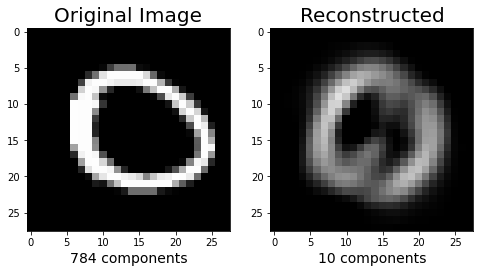

In [22]:
plt.figure(figsize=(8,4));
img_id = 10

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(X_train.to_numpy()[img_id,:].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[img_id].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel(str(pca.n_components_) + ' components', fontsize = 14)
plt.title('Reconstructed', fontsize = 20);

## Showing Graph of Explained Variance vs Number of Principal Components

In [23]:
# if n_components is not set all components are kept (784 in this case)
pca = PCA()

In [24]:
pca.fit(X_train)

PCA()

In [25]:
pca.n_components_

784

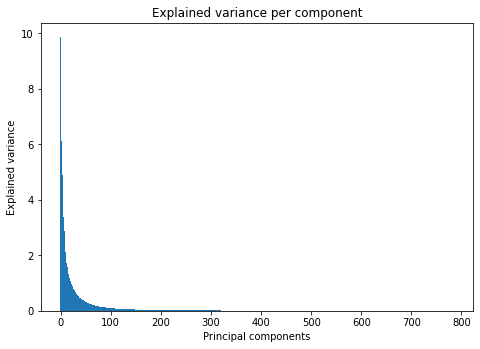

In [26]:
# Summing explained variance
tot = sum(pca.explained_variance_)
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
num_comp = pca.n_components_

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(num_comp), var_exp[:num_comp],width=1)
plt.title('Explained variance per component')
plt.ylabel('Explained variance')
plt.xlabel('Principal components')
plt.show()

What do these principal components look like?


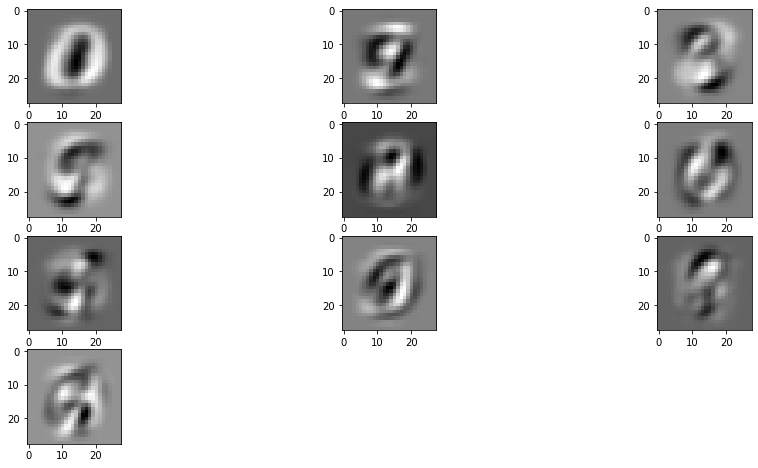

In [27]:
plt.figure(figsize=(16,8));
from PIL import Image

num_of_components_to_display = 10

# Original Image
for i in np.arange(1, num_of_components_to_display+1):
  plt.subplot(4, int(num_of_components_to_display/4 + 1), i);
  plt.imshow(pca.components_[i-1].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest');

Let's see what changing the component along the main basis looks like

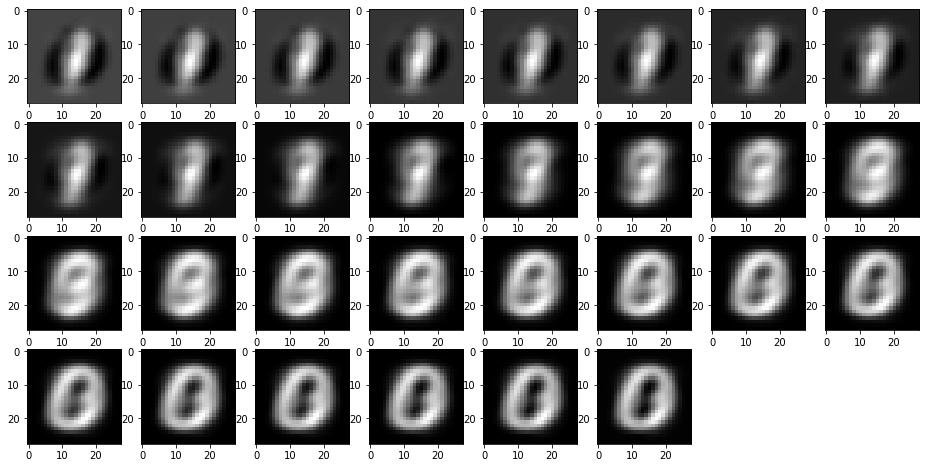

In [12]:
plt.figure(figsize=(16,8));
from PIL import Image

num_of_components_to_display = 30
scale = 100



pca = PCA(n_components=1)
pca.fit(X_train)


# Original Image
for i in np.arange(-int(num_of_components_to_display/2), int(num_of_components_to_display/2), 1):
  approximation = pca.inverse_transform(i*scale)
  plt.subplot(4, int(num_of_components_to_display/4 + 1), i+int(num_of_components_to_display/2)+1);
  plt.imshow(approximation.reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest');

Plot can help you understand the level of redundancy present in multiple dimensions.

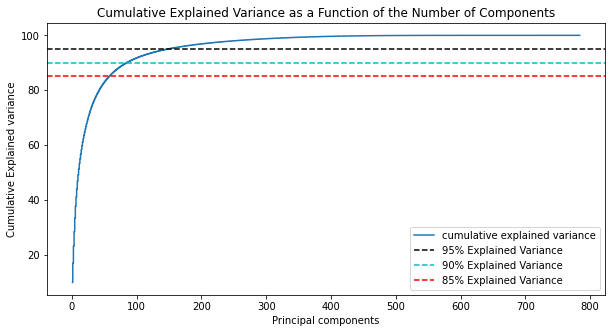

In [28]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
cum_var_exp = np.cumsum(var_exp) 
plt.figure(figsize=(10, 5))
plt.step(range(1, 785), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

How does it work with classification?

100%|██████████| 11/11 [00:43<00:00,  3.92s/it]


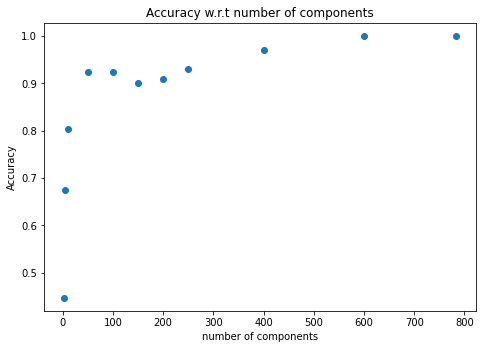

In [29]:
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn.pipeline import make_pipeline

num_of_components_list = [2, 5, 10,50,100,150,200,250,400,600, pca.n_components_]

results = []
for i in tqdm(num_of_components_list):  
  pca = PCA(n_components=i)
  lower_dimensional_data = pca.fit_transform(X_train) 
  pipe = make_pipeline(StandardScaler(),LogisticRegression(max_iter=500)) #StandardScaler(), 
  pipe.fit(lower_dimensional_data, y_train)
  results.append(pipe.score(pca.fit_transform(X_train), y_train))

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(num_of_components_list, results)
plt.title('Accuracy w.r.t number of components')
plt.ylabel('Accuracy')
plt.xlabel('number of components')
plt.show()